# Predicting 2026 World Cup Winner
### Project Title: Predicting the 2026 FIFA World Cup Winner with Machine Learning
### 
#### Done By: Rofhiwa Ramphele

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Exploration and Cleaning</a>

<a href=#three>3. Exploratory Data Analysis (EDA) </a>

<a href=#four>4. Machine Learning</a>

<a href=#five>5. Hyperparameter Tuning</a>

<a href=#six>6. Conclussion </a>

<a href=#seven>7. References</a>

<img src="trophy.png" width="1200"/>

<a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** To build a predictive machine learning model that estimates which national team is most likely to win the 2026 FIFA World Cup, using historical and recent football data.


**Details:** 

1. Problem Domain:
Football (soccer) is the world’s most popular sport, with the FIFA World Cup being its biggest stage. Fans, analysts, and stakeholders are constantly speculating about which team will lift the trophy. This project applies machine learning techniques to offer data-driven insights and predictions ahead of the 2026 World Cup, making the guessing game smarter and more objective.

2. Challenges Addressed:
* Fan Speculation vs Data-Driven Insight – Most World Cup predictions are emotional or anecdotal. This project grounds predictions in statistics, performance metrics, and history.
* Feature Complexity & Team Dynamics – National teams change over time. The model must factor in dynamic features like recent form, player stats, and historical performance.
* Engagement Through Explainability – Football fans want to know why a team is predicted to win. The project emphasizes model interpretability to generate meaningful discussions.
* Scalability of Sports Analytics – By automating data ingestion and model retraining, this project showcases scalable approaches to sports forecasting across tournaments.

3. Background Information:
The FIFA World Cup is more than just a tournament — it's a cultural phenomenon watched by billions. Predicting its outcome is both an analytical challenge and a fun experiment. Using historical match data, FIFA rankings, and team statistics, this project trains a machine learning model to rank the most probable champions of the 2026 tournament. Beyond forecasting, it demonstrates how data science can add value to sports storytelling, fan engagement, and predictive analytics in real-world scenarios.
---

# 1. Import Necessary Libraries and Load the Dataset

In [112]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Load Dataset

wrldcup_df = pd.read_csv("world_cup_1930-2022.csv", encoding='ISO-8859-1')
wrldcup_df

,Key Id,Tournament Id,tournament Name,Match Id,Match Name,Stage Name,Group Name,Group Stage,Knockout Stage,Replayed,...,Away Team Score Margin,Extra Time,Penalty Shootout,Score Penalties,Home Team Score Penalties,Away Team Score Penalties,Result,Home Team Win,Away Team Win,Draw
0,1,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,group stage,Group 1,1,0,0,...,-3,0,0,0-0,0,0,home team win,1,0,0
1,2,WC-1930,1930 FIFA World Cup,M-1930-02,United States v Belgium,group stage,Group 4,1,0,0,...,-3,0,0,0-0,0,0,home team win,1,0,0
2,3,WC-1930,1930 FIFA World Cup,M-1930-03,Yugoslavia v Brazil,group stage,Group 2,1,0,0,...,-1,0,0,0-0,0,0,home team win,1,0,0
3,4,WC-1930,1930 FIFA World Cup,M-1930-04,Romania v Peru,group stage,Group 3,1,0,0,...,-2,0,0,0-0,0,0,home team win,1,0,0
4,5,WC-1930,1930 FIFA World Cup,M-1930-05,Argentina v France,group stage,Group 1,1,0,0,...,-1,0,0,0-0,0,0,home team win,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,960,WC-2022,2022 FIFA World Cup,M-2022-60,England v France,quarter-finals,not applicable,0,1,0,...,1,0,0,0-0,0,0,away team win,0,1,0
960,961,WC-2022,2022 FIFA World Cup,M-2022-61,Argentina v Croatia,semi-finals,not applicable,0,1,0,...,-3,0,0,0-0,0,0,home team win,1,0,0
961,962,WC-2022,2022 FIFA World Cup,M-2022-62,France v Morocco,semi-finals,not applicable,0,1,0,...,-2,0,0,0-0,0,0,home team win,1,0,0
962,963,WC-2022,2022 FIFA World Cup,M-2022-63,Croatia v Morocco,third-place match,not applicable,0,1,0,...,-1,0,0,0-0,0,0,home team win,1,0,0


# 2. Data Exploration and Cleaning

### 2.1 Data Exploration

* I'll be inspecting the dataset, checking its shape, structure, column types, null values, and duplicates. This allows to understand what data is available and what might be missing or irrelevant for the modeling goal.

In [114]:
# Explore the shape of the dataset
wrldcup_df.shape

(964, 37)

In [115]:
# Show data's info
wrldcup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Key Id                     964 non-null    int64 
 1   Tournament Id              964 non-null    object
 2   tournament Name            964 non-null    object
 3   Match Id                   964 non-null    object
 4   Match Name                 964 non-null    object
 5   Stage Name                 964 non-null    object
 6   Group Name                 964 non-null    object
 7   Group Stage                964 non-null    int64 
 8   Knockout Stage             964 non-null    int64 
 9   Replayed                   964 non-null    int64 
 10  Replay                     964 non-null    int64 
 11  Match Date                 964 non-null    object
 12  Match Time                 964 non-null    object
 13  Stadium Id                 964 non-null    object
 14  Stadium Na

In [116]:
wrldcup_df.describe()

,Key Id,Group Stage,Knockout Stage,Replayed,Replay,Home Team Score,Away Team Score,Home Team Score Margin,Away Team Score Margin,Extra Time,Penalty Shootout,Home Team Score Penalties,Away Team Score Penalties,Home Team Win,Away Team Win,Draw
count,964.00000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000
mean,482.50000,0.744813,0.255187,0.004149,0.004149,1.766598,1.054979,0.711618,-0.711618,0.075726,0.036307,0.121369,0.108921,0.565353,0.248963,0.185685
std,278.42713,0.436192,0.436192,0.064315,0.064315,1.601040,1.071720,1.925893,1.925893,0.264697,0.187150,0.665731,0.600764,0.495968,0.432637,0.389054
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,241.75000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,482.50000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,723.25000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,964.00000,1.000000,1.000000,1.000000,1.000000,10.000000,7.000000,9.000000,7.000000,1.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000


In [117]:
# Check for missing values
missing_cols = wrldcup_df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]

if not missing_cols.empty:
    print("Columns with missing values:")
    for col, count in missing_cols.items():
        print(f"{col}: {count} missing")
else:
    print("There are no missing values.")


There are no missing values.


In [118]:
# Check for duplicates
wrldcup_df.duplicated().sum()

0

* The code below reveals all the distinct tournament editions included in the dataset. Since the focus is on predicting the 2026 FIFA World Cup, I'm mainly interested in standard FIFA World Cup tournament and here I'm just making sure there's not friendly matches or world cup qualifiers games included in the dataset.

In [119]:
# Unique tournaments
print("\nTournaments:", wrldcup_df['tournament Name'].unique())


Tournaments: ['1930 FIFA World Cup' '1934 FIFA World Cup' '1938 FIFA World Cup'
 '1950 FIFA World Cup' '1954 FIFA World Cup' '1958 FIFA World Cup'
 '1962 FIFA World Cup' '1966 FIFA World Cup' '1970 FIFA World Cup'
 '1974 FIFA World Cup' '1978 FIFA World Cup' '1982 FIFA World Cup'
 '1986 FIFA World Cup' '1990 FIFA World Cup' '1994 FIFA World Cup'
 '1998 FIFA World Cup' '2002 FIFA World Cup' '2006 FIFA World Cup'
 '2010 FIFA World Cup' '2014 FIFA World Cup' '2018 FIFA World Cup'
 '2022 FIFA World Cup']


* Here will show the different phases of the tournament (e.g. Group Stage, Quarter-finals, Final). I think knowing which matches belong to knockout rounds is critical because team behavior often changes under high pressure. So, I'll use this info to segment match intensity and engineer stage-related features later.

In [120]:
# tournaments stages
print("\nStages:", wrldcup_df['Stage Name'].unique())


Stages: ['group stage' 'semi-finals' 'final' 'round of 16' 'quarter-finals'
 'third-place match' 'final round' 'second group stage']


* And again, below is a quick sample of national teams present in the dataset. This will help in checking for inconsistencies. e.g., if maybe “USA” and “United States” are treated differently. This is important to fix during data cleaning step to avoid duplicate entries under different names.

In [121]:
# tournaments countries
print("\nSample Team Names:\n", wrldcup_df['Home Team Name'].unique()[:20])


Sample Team Names:
 ['France' 'United States' 'Yugoslavia' 'Romania' 'Argentina' 'Chile'
 'Uruguay' 'Brazil' 'Paraguay' 'Austria' 'Czechoslovakia' 'Germany'
 'Hungary' 'Italy' 'Spain' 'Sweden' 'Switzerland' 'Cuba' 'England'
 'West Germany']


* Here the aim is to show how many matches were played in each year of the dataset. This allows to:

  * Verify that every 4-year World Cup cycle is represented
  * Spot any years with unusual match counts (maybe due to replays)
  * Understand data density across different eras — older tournaments had fewer teams/matches, while modern ones (like 2022 and upcoming 2026) have more matches

In [122]:
# how many matches were played in each year
wrldcup_df['Year'] = wrldcup_df['Match Date'].apply(lambda x: x.split('-')[0])
print("\nMatches per year:\n", wrldcup_df['Year'].value_counts().sort_index())


Matches per year:
 Year
11/20/2022    1
11/21/2022    3
11/22/2022    4
11/23/2022    4
11/24/2022    4
             ..
7/8/2014      1
7/9/1950      2
7/9/1994      2
7/9/2006      1
7/9/2014      1
Name: count, Length: 378, dtype: int64


In [123]:
# Total number of matches played
total_matches = len(wrldcup_df)
print(f"Total number of FIFA World Cup matches played (1930–2022): {total_matches}")

Total number of FIFA World Cup matches played (1930–2022): 964


/var/folders/1p/j5cy5qsd0lvgfcb0hv_4sbp80000gn/T/ipykernel_1186/2526178299.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result_counts.index, y=result_counts.values, palette='viridis')


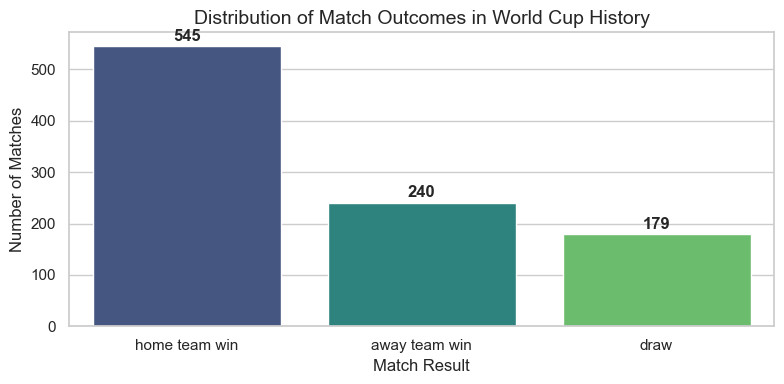

In [124]:
# Count occurrences of each result type
result_counts = wrldcup_df['Result'].value_counts()

# Create barplot
plt.figure(figsize=(8, 4))
sns.barplot(x=result_counts.index, y=result_counts.values, palette='viridis')

# Add labels on top of each bar
for i, value in enumerate(result_counts.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontweight='bold')

# Styling
plt.title('Distribution of Match Outcomes in World Cup History', fontsize=14)
plt.ylabel('Number of Matches')
plt.xlabel('Match Result')
plt.tight_layout()
plt.show()


* To better understand how teams have historically performed in FIFA World Cups, I'll compute the number of wins, draws, and losses for each national team by combining both home and away results.

* And these findings and performance metrics are crucial for:
  * Identifying historically strong teams
  * Calculating win/loss rates which will serve as features for machine learning model
  * Help interpret which teams are most consistent over time



In [125]:
# Count wins per team (home and away)
home_wins = wrldcup_df[wrldcup_df['Home Team Win'] == 1]['Home Team Name'].value_counts()
away_wins = wrldcup_df[wrldcup_df['Away Team Win'] == 1]['Away Team Name'].value_counts()
team_wins = home_wins.add(away_wins, fill_value=0)

In [126]:
# Count draws per team
home_draws = wrldcup_df[wrldcup_df['Draw'] == 1]['Home Team Name'].value_counts()
away_draws = wrldcup_df[wrldcup_df['Draw'] == 1]['Away Team Name'].value_counts()
team_draws = home_draws.add(away_draws, fill_value=0)

In [127]:
# Count losses per team (home and away)
# A home team loses if the away team wins, and vice versa
home_losses = wrldcup_df[wrldcup_df['Away Team Win'] == 1]['Home Team Name'].value_counts()
away_losses = wrldcup_df[wrldcup_df['Home Team Win'] == 1]['Away Team Name'].value_counts()
team_losses = home_losses.add(away_losses, fill_value=0)


In [128]:
# Combine into a dataframe
team_performance = pd.DataFrame({
    'Wins': team_wins,
    'Draws': team_draws,
    'Losses': team_losses
}).fillna(0).astype(int)

# ➕ Calculate total matches
team_performance['Total Matches'] = (
    team_performance['Wins'] + team_performance['Draws'] + team_performance['Losses']
)

In [129]:
# Sort by total wins
team_performance = team_performance.sort_values(by='Wins', ascending=False)
team_performance.head(10)

,Wins,Draws,Losses,Total Matches
Brazil,79,14,21,114
Argentina,53,10,25,88
Italy,46,17,20,83
France,41,9,23,73
West Germany,39,11,12,62
England,33,18,23,74
Germany,33,6,11,50
Spain,32,12,23,67
Netherlands,31,10,14,55
Uruguay,26,12,21,59


- Interpretation
  * Brazil leads with a commanding 79 wins across 114 matches — the most successful team historically.
  * Argentina, Italy, and France follow closely, each with strong records of performance.
  * And interesting to note: Germany appears twice as both West Germany and Germany due to historical naming. Which I may consider merging them in future analysis.



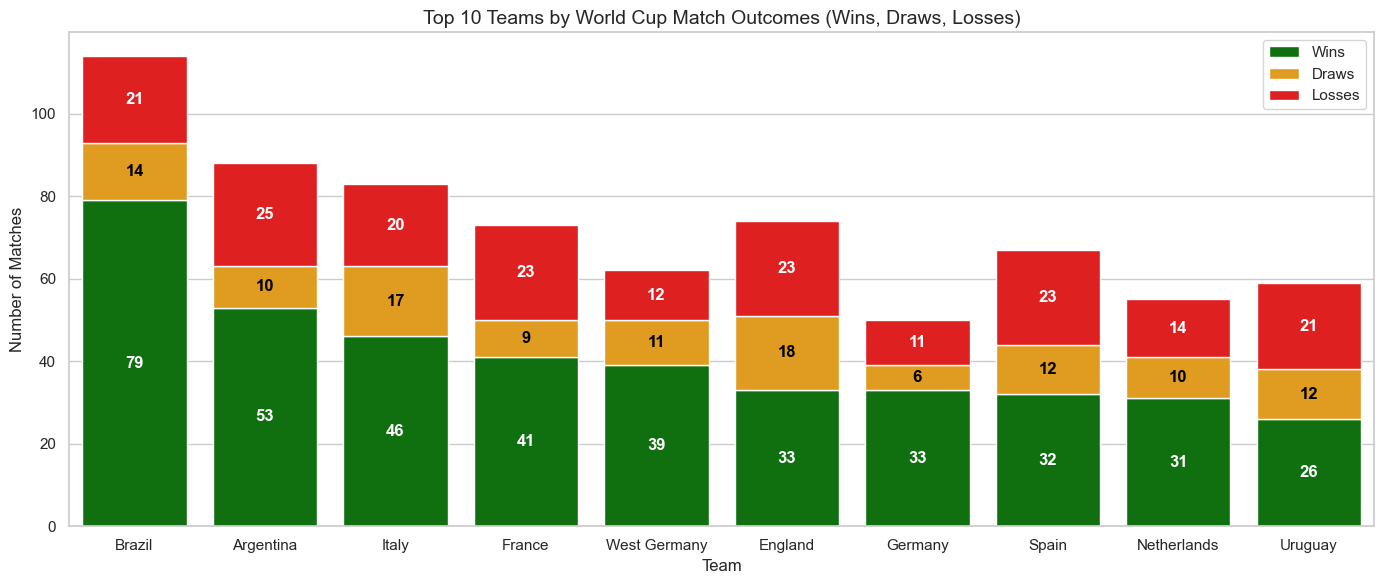

In [130]:
# Get top 10 teams by total wins 
top_teams = team_performance.head(10).copy()
top_teams = top_teams.reset_index().rename(columns={'index': 'Team'})

# Plot stacked bar chart (Wins → Draws → Losses)
plt.figure(figsize=(14, 6))

# Wins (bottom layer)
sns.barplot(data=top_teams, x='Team', y='Wins', color='green', label='Wins')

# Draws (stacked on top of Wins)
sns.barplot(data=top_teams, x='Team', y='Draws', 
            bottom=top_teams['Wins'], color='orange', label='Draws')

# Losses (stacked on top of Wins + Draws)
sns.barplot(data=top_teams, x='Team', y='Losses',
            bottom=top_teams['Wins'] + top_teams['Draws'], color='red', label='Losses')

# Add value labels inside each segment
for index, row in top_teams.iterrows():
    # Wins
    plt.text(index, row['Wins'] / 2, row['Wins'], ha='center', va='center', color='white', fontweight='bold')
    
    # Draws
    plt.text(index, row['Wins'] + row['Draws'] / 2, row['Draws'], ha='center', va='center', color='black', fontweight='bold')
    
    # Losses
    plt.text(index, row['Wins'] + row['Draws'] + row['Losses'] / 2, row['Losses'], ha='center', va='center', color='white', fontweight='bold')

# Final plot styling
plt.title('Top 10 Teams by World Cup Match Outcomes (Wins, Draws, Losses)', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.legend()
plt.tight_layout()
plt.show()




/var/folders/1p/j5cy5qsd0lvgfcb0hv_4sbp80000gn/T/ipykernel_1186/1100647294.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=goal_df, x='Team', y='Goals', palette='magma')


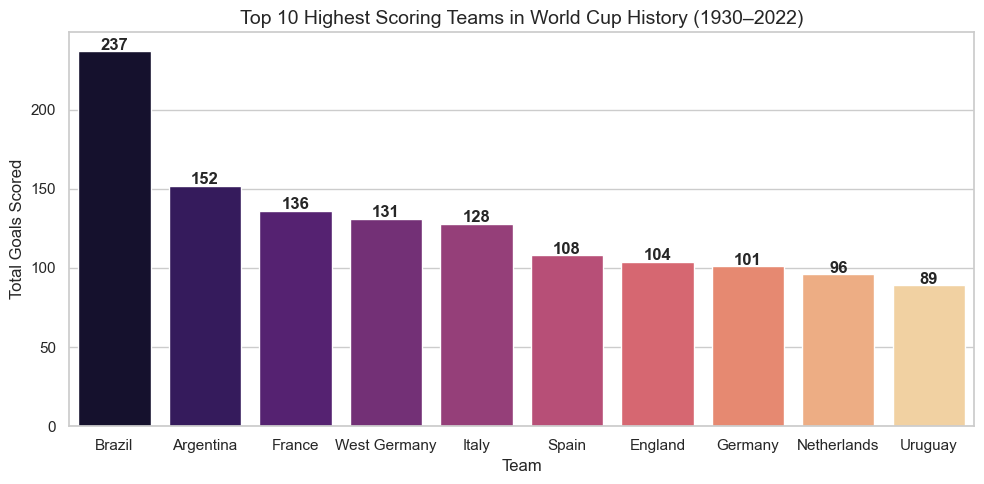

In [131]:
# Goals scored as Home and Away
home_goals = wrldcup_df.groupby('Home Team Name')['Home Team Score'].sum()
away_goals = wrldcup_df.groupby('Away Team Name')['Away Team Score'].sum()

# Total goals
total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False)

# Convert to DataFrame and visualize top 10
goal_df = total_goals.head(10).reset_index()
goal_df.columns = ['Team', 'Goals']

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=goal_df, x='Team', y='Goals', palette='magma')

# Label bars
for i, row in goal_df.iterrows():
    plt.text(i, row['Goals'] + 1, int(row['Goals']), ha='center', fontweight='bold')

plt.title('Top 10 Highest Scoring Teams in World Cup History (1930–2022)', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Total Goals Scored')
plt.tight_layout()
plt.show()


/var/folders/1p/j5cy5qsd0lvgfcb0hv_4sbp80000gn/T/ipykernel_1186/3769957909.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=knockout_df_top, x='Team', y='Knockout Matches', palette='coolwarm')


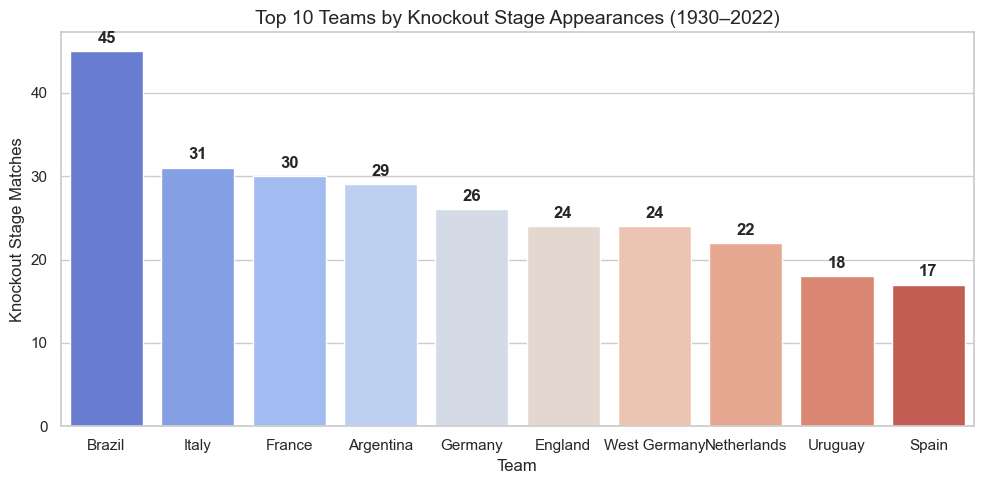

In [132]:
# Filter for knockout stage matches only
knockout_df = wrldcup_df[wrldcup_df['Knockout Stage'] == 1]

# Count how many times each team appeared in knockouts
home_knockouts = knockout_df['Home Team Name'].value_counts()
away_knockouts = knockout_df['Away Team Name'].value_counts()

# Combine
total_knockouts = home_knockouts.add(away_knockouts, fill_value=0).sort_values(ascending=False)

# Top 10 teams
knockout_df_top = total_knockouts.head(10).reset_index()
knockout_df_top.columns = ['Team', 'Knockout Matches']

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=knockout_df_top, x='Team', y='Knockout Matches', palette='coolwarm')

for i, row in knockout_df_top.iterrows():
    plt.text(i, row['Knockout Matches'] + 1, int(row['Knockout Matches']), ha='center', fontweight='bold')

plt.title('Top 10 Teams by Knockout Stage Appearances (1930–2022)', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Knockout Stage Matches')
plt.tight_layout()
plt.show()


### 2.2 Data Cleaning

In [133]:
# Replace 'West Germany' with 'Germany' in both home and away columns
wrldcup_df['Home Team Name'] = wrldcup_df['Home Team Name'].replace('West Germany', 'Germany')
wrldcup_df['Away Team Name'] = wrldcup_df['Away Team Name'].replace('West Germany', 'Germany')


In [134]:
# Drop columns that are not useful for modeling
columns_to_drop = [
    'Key Id', 'Tournament Id', 'Match Id', 'Match Name',
    'Stadium Id', 'Stadium Name', 'City Name', 'Country Name',
    'Home Team Id', 'Away Team Id', 'Home Team Code', 'Away Team Code',
    'Match Time', 'Score', 'Score Penalties', 'Replay', 'Replayed'
]

df_cleaned = wrldcup_df.drop(columns=columns_to_drop)
print("Remaining columns:\n", df_cleaned.columns.tolist())

Remaining columns:
 ['tournament Name', 'Stage Name', 'Group Name', 'Group Stage', 'Knockout Stage', 'Match Date', 'Home Team Name', 'Away Team Name', 'Home Team Score', 'Away Team Score', 'Home Team Score Margin', 'Away Team Score Margin', 'Extra Time', 'Penalty Shootout', 'Home Team Score Penalties', 'Away Team Score Penalties', 'Result', 'Home Team Win', 'Away Team Win', 'Draw', 'Year']


In [135]:
# Rename columns for consistency
df_cleaned.columns = df_cleaned.columns.str.lower().str.replace(" ", "_")

# Show new column names
print("Cleaned column names:\n", df_cleaned.columns.tolist())

Cleaned column names:
 ['tournament_name', 'stage_name', 'group_name', 'group_stage', 'knockout_stage', 'match_date', 'home_team_name', 'away_team_name', 'home_team_score', 'away_team_score', 'home_team_score_margin', 'away_team_score_margin', 'extra_time', 'penalty_shootout', 'home_team_score_penalties', 'away_team_score_penalties', 'result', 'home_team_win', 'away_team_win', 'draw', 'year']


In [136]:
# Convert match_date to datetime
df_cleaned['match_date'] = pd.to_datetime(df_cleaned['match_date'], errors='coerce')

# Extract year
df_cleaned['year'] = df_cleaned['match_date'].dt.year

# Check the changes
df_cleaned[['match_date', 'year']].head()

,match_date,year
0,1930-07-13,1930
1,1930-07-13,1930
2,1930-07-14,1930
3,1930-07-14,1930
4,1930-07-15,1930


In [137]:
# Check for missing values again
missing = df_cleaned.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
    print("No missing values found in the dataset.")
else:
    print("Missing values detected:\n")
    print(missing)


No missing values found in the dataset.


In [138]:
# Double check for any duplicates
duplicates = df_cleaned.duplicated().sum()
print(f"Duplicate rows remaining: {duplicates}")

Duplicate rows remaining: 0


In [139]:
# Check number of matches per year
matches_by_year = df_cleaned['year'].value_counts().sort_index()
print("Matches played per year:\n", matches_by_year)

Matches played per year:
 year
1930    18
1934    17
1938    18
1950    22
1954    26
1958    35
1962    32
1966    32
1970    32
1974    38
1978    38
1982    52
1986    52
1990    52
1994    52
1998    64
2002    64
2006    64
2010    64
2014    64
2018    64
2022    64
Name: count, dtype: int64


In [140]:
df_cleaned['total_goals'] = df_cleaned['home_team_score'] + df_cleaned['away_team_score']

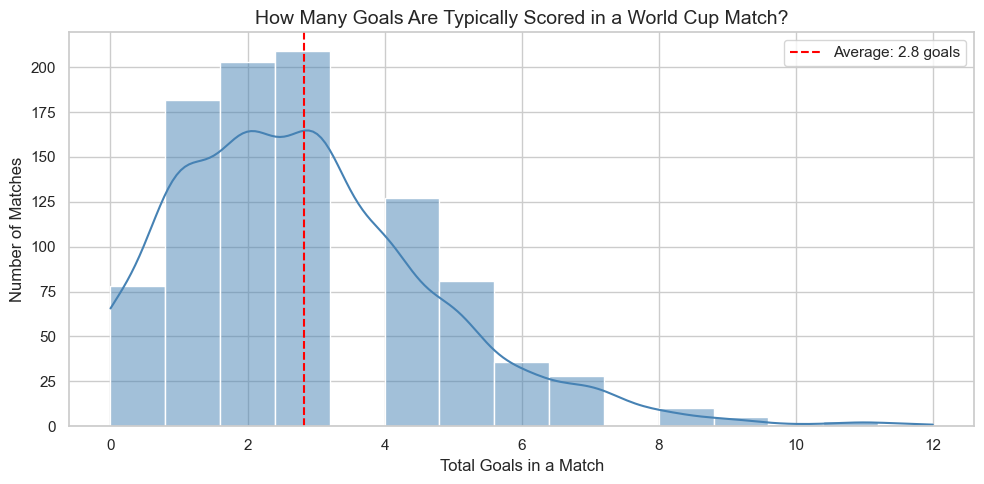

In [141]:
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['total_goals'], bins=15, kde=True, color='steelblue')

plt.title("How Many Goals Are Typically Scored in a World Cup Match?", fontsize=14)
plt.xlabel("Total Goals in a Match")
plt.ylabel("Number of Matches")

# Add annotation
plt.axvline(df_cleaned['total_goals'].mean(), color='red', linestyle='--', label=f"Average: {df_cleaned['total_goals'].mean():.1f} goals")
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/1p/j5cy5qsd0lvgfcb0hv_4sbp80000gn/T/ipykernel_1186/2858745567.py:10: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/rofhiwaramps/.pyenv/versions/3.12.4/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


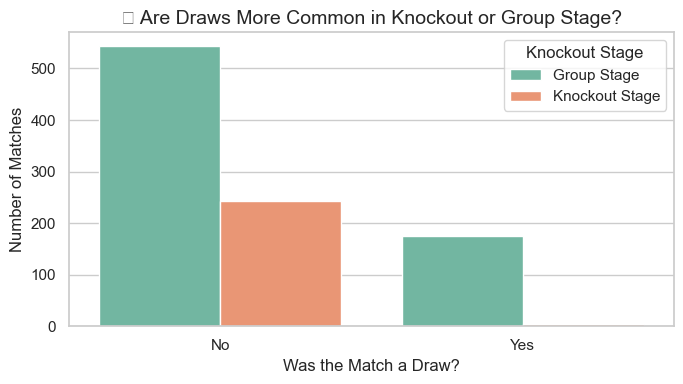

In [142]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df_cleaned, x='draw', hue='knockout_stage', palette='Set2')

plt.title("🤔 Are Draws More Common in Knockout or Group Stage?", fontsize=14)
plt.xlabel("Was the Match a Draw?")
plt.ylabel("Number of Matches")
plt.xticks([0, 1], ['No', 'Yes'])

plt.legend(title='Knockout Stage', labels=['Group Stage', 'Knockout Stage'])
plt.tight_layout()
plt.show()


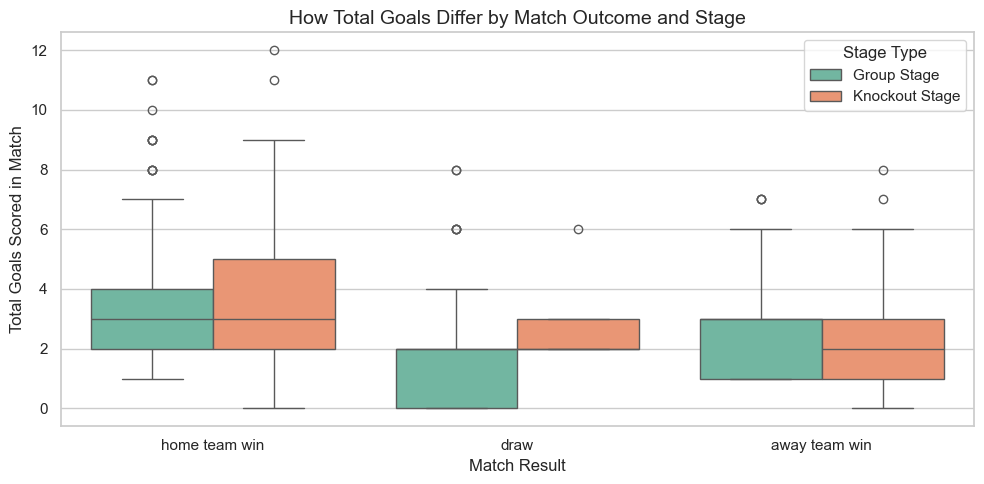

In [143]:
# Fix colors by mapping 0 → Group, 1 → Knockout
df_cleaned['stage_type'] = df_cleaned['knockout_stage'].map({0: 'Group Stage', 1: 'Knockout Stage'})

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='result', y='total_goals', hue='stage_type', palette='Set2')

plt.title("How Total Goals Differ by Match Outcome and Stage", fontsize=14)
plt.xlabel("Match Result")
plt.ylabel("Total Goals Scored in Match")
plt.legend(title='Stage Type')
plt.tight_layout()
plt.show()

